# Spatial Analysis IV

## Spatial Joins (Cont..)

We have covered two predicaments within and contains for spatial joins in the last lecture. In this lecture we will cover intersects (which we have seen in Lecture 10) with respect to spatial joins. 

### Intersects

![intersects](images/intersects.png)

![intersects2](images/intersects2.png)

So let us look at an example. 

We want to find out all the zip codes in Cuyahoga County that has an interstate highway passing through it. So lets load up the roads first. 

In [61]:
import geopandas as gpd
import pandas as pd
allRoadsCuy =gpd.read_file(r'../../largedatasets/cuyahoga_roads/tl_2021_39035_roads.shp')
allRoadsCuy.head()

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
0,1104690927652,Emily Exd,M,S1400,"LINESTRING (-81.58825 41.52712, -81.58883 41.5..."
1,1104694999619,Detroit Rd Exd,M,S1400,"LINESTRING (-81.82750 41.48152, -81.82790 41.4..."
2,110455985752,Brookpark Rd Exd,M,S1400,"LINESTRING (-81.91675 41.41958, -81.91719 41.4..."
3,110455940257,US Hwy 6 Alt,U,S1200,"LINESTRING (-81.70737 41.49142, -81.70828 41.4..."
4,110455953959,Old S Miles Rd,M,S1400,"LINESTRING (-81.45271 41.39312, -81.45172 41.3..."


The code for interstate highway is 'I'. So we can use our selection by string to retrieve the necessary records.

In [14]:
interstate = allRoadsCuy[allRoadsCuy.RTTYP=='I']
interstate.head()

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
3001,1104486142517,I- 271 Express Lane,I,S1100,"LINESTRING (-81.50605 41.43011, -81.50577 41.4..."
4749,1104782794770,I- 271,I,S1100,"LINESTRING (-81.44765 41.56996, -81.44762 41.5..."
4762,1106087244964,I- 480,I,S1100,"LINESTRING (-81.97046 41.38845, -81.96689 41.3..."
5057,1105089436477,I- 490,I,S1100,"LINESTRING (-81.69920 41.47417, -81.69852 41.4..."
5121,1105089436476,I- 490,I,S1100,"LINESTRING (-81.65147 41.47961, -81.65248 41.4..."


So now we have the interstate highways passing through Cuyahoga County. Now let us bring all the zip codes in Cuyahoga County. 

In [16]:
zipUSA.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,36083,8600000US36083,36083,659750662,5522919,"MULTIPOLYGON (((-85.63225 32.28098, -85.62439 ..."
1,35441,8600000US35441,35441,172850429,8749105,"MULTIPOLYGON (((-87.83287 32.84437, -87.83184 ..."
2,35051,8600000US35051,35051,280236456,5427285,"POLYGON ((-86.74384 33.25002, -86.73802 33.251..."
3,35121,8600000US35121,35121,372736030,5349303,"POLYGON ((-86.58527 33.94743, -86.58033 33.948..."
4,35058,8600000US35058,35058,178039922,3109259,"MULTIPOLYGON (((-86.87884 34.21196, -86.87649 ..."


Unfortunately we don't have any information suggesting which zip code belong to which County (or even which state). So how will we solve this??

Of course by bringing in the county shapefile 

In [21]:
ohCounties = gpd.read_file(r'../../largedatasets/ohio_county_boundaries/ODOT_County_Boundaries.shp')
ohCounties.head()

,OBJECTID,COUNTY_CD,COUNTY_SEA,ODOT_DISTR,FIPS_COUNT,POP_2010,POP_2000,POP_1990,STATE_PLAN,ELEVATION_,...,LONG_WEST_,AREA_SQMI,AREA_ID,created_us,created_da,last_edite,last_edi_1,SHAPE_STAr,SHAPE_STLe,geometry
0,1,HIG,HILLSBORO,9,39071,43589,40875,35728,S,1340,...,-83.873,557.74,53,Esri_Anonymous,2015-08-11,Esri_Anonymous,2015-08-11,2.407747e+09,213157.740992,"POLYGON ((-83.78330 39.26382, -83.78312 39.263..."
1,2,HOC,LOGAN,10,39073,29380,28241,25533,S,1220,...,-82.748,423.50,54,Esri_Anonymous,2015-08-11,Esri_Anonymous,2015-08-11,1.844277e+09,215451.632241,"POLYGON ((-82.49595 39.60265, -82.49505 39.612..."
2,3,HOL,MILLERSBURG,11,39075,42366,38943,32849,N,1380,...,-82.222,424.03,55,Esri_Anonymous,2015-08-11,Esri_Anonymous,2015-08-11,1.905310e+09,193045.013152,"POLYGON ((-81.87727 40.66713, -81.87564 40.667..."
3,4,HUR,NORWALK,3,39077,59626,59487,56240,N,1200,...,-82.843,495.96,56,Esri_Anonymous,2015-08-11,Esri_Anonymous,2015-08-11,2.267372e+09,197349.121399,"POLYGON ((-82.83547 41.14407, -82.83549 41.145..."
4,5,FRA,COLUMBUS,6,39049,1163414,1068978,961437,S,1130,...,-83.255,543.97,143,Esri_Anonymous,2015-08-11,Esri_Anonymous,2015-08-11,2.401407e+09,211754.151636,"POLYGON ((-83.24596 39.96574, -83.24595 39.965..."


Now you can easily select Cuyahoga county using the COUNTY_CD field

<AxesSubplot:>

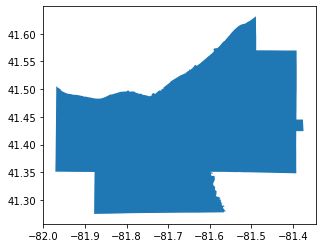

In [24]:
cuyCounty = ohCounties[ohCounties.COUNTY_CD=='CUY']
cuyCounty.plot()

Ok now we have Cuyahoga county. How do we extract out all the zip codes that are with in Cuyahoga County. 

We will use within predicate on the zip code centroids to find out the zip codes that are within Cuyahoga County

In [25]:
cuyCounty.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
zipUSA.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

Let us convert cuyCounty crs to EPSG:4269

In [27]:
cuyCounty = cuyCounty.to_crs('EPSG:4269')

In [30]:
cuyZips = zipUSA[zipUSA.within(cuyCounty.geometry.values[0])]
cuyZips.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
2755,44101,8600000US44101,44101,90423,0,"POLYGON ((-81.66821 41.49141, -81.66561 41.490..."
3348,44145,8600000US44145,44145,41248938,9744,"POLYGON ((-81.96996 41.41891, -81.96946 41.478..."
3470,44121,8600000US44121,44121,16246647,0,"POLYGON ((-81.55580 41.52821, -81.55569 41.536..."
3472,44126,8600000US44126,44126,11977527,0,"POLYGON ((-81.87511 41.43709, -81.87445 41.446..."
4959,44017,8600000US44017,44017,15933176,273258,"POLYGON ((-81.89674 41.37514, -81.89502 41.377..."


In [31]:
interstate.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

Since we have matching crs for both the zip codes and the road data, we can proceed with spatial join

In [33]:
zipsIntersect = cuyZips.sjoin(interstate,predicate='intersects')
zipsIntersect

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,index_right,LINEARID,FULLNAME,RTTYP,MTFCC
2755,44101,8600000US44101,44101,90423,0,"POLYGON ((-81.66821 41.49141, -81.66561 41.490...",13865,1104487239605,I- 77,I,S1100
16549,44115,8600000US44115,44115,5731968,119831,"POLYGON ((-81.69216 41.49790, -81.69064 41.498...",13865,1104487239605,I- 77,I,S1100
19654,44127,8600000US44127,44127,4910276,2514,"POLYGON ((-81.66900 41.47044, -81.66793 41.470...",13865,1104487239605,I- 77,I,S1100
20725,44125,8600000US44125,44125,36828255,747155,"POLYGON ((-81.68463 41.44735, -81.67331 41.447...",13865,1104487239605,I- 77,I,S1100
22188,44105,8600000US44105,44105,22692441,233751,"POLYGON ((-81.68328 41.44891, -81.68123 41.449...",13865,1104487239605,I- 77,I,S1100
...,...,...,...,...,...,...,...,...,...,...,...
19828,44122,8600000US44122,44122,34147927,60249,"MULTIPOLYGON (((-81.55047 41.47772, -81.54984 ...",3001,1104486142517,I- 271 Express Lane,I,S1100
25521,44124,8600000US44124,44124,37702305,122478,"POLYGON ((-81.51136 41.51948, -81.50715 41.519...",3001,1104486142517,I- 271 Express Lane,I,S1100
19656,44128,8600000US44128,44128,21772276,18864,"POLYGON ((-81.58500 41.44185, -81.58400 41.443...",13770,1104486182669,I- 271 Express Lane,I,S1100
19828,44122,8600000US44122,44122,34147927,60249,"MULTIPOLYGON (((-81.55047 41.47772, -81.54984 ...",13770,1104486182669,I- 271 Express Lane,I,S1100


Similar to our previous examples, the spatial join will return records for each matches and we can have a zip code with multiple interstates passing through it. So we can call drop duplicates to idenitfy the zip codes that have atleast one interstate passing through it. 

In [37]:
zipsWithAtleastOneInterstate = zipsIntersect.drop_duplicates(subset='ZCTA5CE10')
zipsWithAtleastOneInterstate

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,index_right,LINEARID,FULLNAME,RTTYP,MTFCC
2755,44101,8600000US44101,44101,90423,0,"POLYGON ((-81.66821 41.49141, -81.66561 41.490...",13865,1104487239605,I- 77,I,S1100
16549,44115,8600000US44115,44115,5731968,119831,"POLYGON ((-81.69216 41.49790, -81.69064 41.498...",13865,1104487239605,I- 77,I,S1100
19654,44127,8600000US44127,44127,4910276,2514,"POLYGON ((-81.66900 41.47044, -81.66793 41.470...",13865,1104487239605,I- 77,I,S1100
20725,44125,8600000US44125,44125,36828255,747155,"POLYGON ((-81.68463 41.44735, -81.67331 41.447...",13865,1104487239605,I- 77,I,S1100
22188,44105,8600000US44105,44105,22692441,233751,"POLYGON ((-81.68328 41.44891, -81.68123 41.449...",13865,1104487239605,I- 77,I,S1100
30826,44131,8600000US44131,44131,41649577,306018,"POLYGON ((-81.68566 41.41737, -81.68560 41.419...",13865,1104487239605,I- 77,I,S1100
3348,44145,8600000US44145,44145,41248938,9744,"POLYGON ((-81.96996 41.41891, -81.96946 41.478...",12158,1105089436529,I- 90,I,S1100
22896,44111,8600000US44111,44111,16166706,0,"POLYGON ((-81.83553 41.46962, -81.83231 41.469...",12158,1105089436529,I- 90,I,S1100
3472,44126,8600000US44126,44126,11977527,0,"POLYGON ((-81.87511 41.43709, -81.87445 41.446...",4762,1106087244964,I- 480,I,S1100
7485,44134,8600000US44134,44134,24856975,13625,"POLYGON ((-81.73423 41.35280, -81.73182 41.359...",4762,1106087244964,I- 480,I,S1100


Now we have the zip codes that has atleast one highway passing through it. 

We can also find out the zip codes that doesnot have any interstates running through it.

In [42]:
zipsIntersect2 = cuyZips.sjoin(interstate,predicate='intersects',how='left')
zipsWithoutInterstate = zipsIntersect2[zipsIntersect2.index_right.isnull()]
zipsWithoutInterstate

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,index_right,LINEARID,FULLNAME,RTTYP,MTFCC
3470,44121,8600000US44121,44121,16246647,0,"POLYGON ((-81.55580 41.52821, -81.55569 41.536...",NaN,NaN,NaN,NaN,NaN
8968,44106,8600000US44106,44106,10918900,76016,"POLYGON ((-81.63062 41.50548, -81.62708 41.509...",NaN,NaN,NaN,NaN,NaN
12079,44120,8600000US44120,44120,13764042,109426,"POLYGON ((-81.60912 41.48417, -81.60290 41.484...",NaN,NaN,NaN,NaN,NaN
15698,44104,8600000US44104,44104,12268187,0,"POLYGON ((-81.65822 41.49286, -81.65770 41.495...",NaN,NaN,NaN,NaN,NaN
19672,44118,8600000US44118,44118,18422731,46953,"POLYGON ((-81.59126 41.51062, -81.59122 41.516...",NaN,NaN,NaN,NaN,NaN
22197,44117,8600000US44117,44117,9880710,21280,"POLYGON ((-81.55365 41.56167, -81.53848 41.571...",NaN,NaN,NaN,NaN,NaN
25670,44112,8600000US44112,44112,10470559,30122,"POLYGON ((-81.60022 41.52093, -81.59903 41.520...",NaN,NaN,NaN,NaN,NaN
32346,44129,8600000US44129,44129,15237374,80307,"POLYGON ((-81.75699 41.42154, -81.73435 41.421...",NaN,NaN,NaN,NaN,NaN


We can also find out the number of highways passing through each zip codes

In [43]:
zipsIntersect

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,index_right,LINEARID,FULLNAME,RTTYP,MTFCC
2755,44101,8600000US44101,44101,90423,0,"POLYGON ((-81.66821 41.49141, -81.66561 41.490...",13865,1104487239605,I- 77,I,S1100
16549,44115,8600000US44115,44115,5731968,119831,"POLYGON ((-81.69216 41.49790, -81.69064 41.498...",13865,1104487239605,I- 77,I,S1100
19654,44127,8600000US44127,44127,4910276,2514,"POLYGON ((-81.66900 41.47044, -81.66793 41.470...",13865,1104487239605,I- 77,I,S1100
20725,44125,8600000US44125,44125,36828255,747155,"POLYGON ((-81.68463 41.44735, -81.67331 41.447...",13865,1104487239605,I- 77,I,S1100
22188,44105,8600000US44105,44105,22692441,233751,"POLYGON ((-81.68328 41.44891, -81.68123 41.449...",13865,1104487239605,I- 77,I,S1100
...,...,...,...,...,...,...,...,...,...,...,...
19828,44122,8600000US44122,44122,34147927,60249,"MULTIPOLYGON (((-81.55047 41.47772, -81.54984 ...",3001,1104486142517,I- 271 Express Lane,I,S1100
25521,44124,8600000US44124,44124,37702305,122478,"POLYGON ((-81.51136 41.51948, -81.50715 41.519...",3001,1104486142517,I- 271 Express Lane,I,S1100
19656,44128,8600000US44128,44128,21772276,18864,"POLYGON ((-81.58500 41.44185, -81.58400 41.443...",13770,1104486182669,I- 271 Express Lane,I,S1100
19828,44122,8600000US44122,44122,34147927,60249,"MULTIPOLYGON (((-81.55047 41.47772, -81.54984 ...",13770,1104486182669,I- 271 Express Lane,I,S1100


In [48]:
counts = zipsIntersect.groupby('ZCTA5CE10').size().reset_index().rename(columns={0:'Total Interstates'})
counts

,ZCTA5CE10,Total Interstates
0,44017,2
1,44070,2
2,44101,2
3,44105,2
4,44109,4
5,44111,4
6,44115,6
7,44122,4
8,44124,4
9,44125,4


Seems like some of the zip codes have more than 5 interstates running through them (how is that even possible). This should ring a bell when you are doing data analysis. Let us check one such zip code  

In [49]:
zipsIntersect[zipsIntersect.ZCTA5CE10 == '44128']

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,index_right,LINEARID,FULLNAME,RTTYP,MTFCC
19656,44128,8600000US44128,44128,21772276,18864,"POLYGON ((-81.58500 41.44185, -81.58400 41.443...",4762,1106087244964,I- 480,I,S1100
19656,44128,8600000US44128,44128,21772276,18864,"POLYGON ((-81.58500 41.44185, -81.58400 41.443...",15524,1106087245003,I- 480,I,S1100
19656,44128,8600000US44128,44128,21772276,18864,"POLYGON ((-81.58500 41.44185, -81.58400 41.443...",8442,1104486823377,I- 480N,I,S1100
19656,44128,8600000US44128,44128,21772276,18864,"POLYGON ((-81.58500 41.44185, -81.58400 41.443...",6626,1104486823373,I- 480N,I,S1100
19656,44128,8600000US44128,44128,21772276,18864,"POLYGON ((-81.58500 41.44185, -81.58400 41.443...",4749,1104782794770,I- 271,I,S1100
19656,44128,8600000US44128,44128,21772276,18864,"POLYGON ((-81.58500 41.44185, -81.58400 41.443...",8392,1104486182671,I- 271,I,S1100
19656,44128,8600000US44128,44128,21772276,18864,"POLYGON ((-81.58500 41.44185, -81.58400 41.443...",3001,1104486142517,I- 271 Express Lane,I,S1100
19656,44128,8600000US44128,44128,21772276,18864,"POLYGON ((-81.58500 41.44185, -81.58400 41.443...",13770,1104486182669,I- 271 Express Lane,I,S1100


As you can see there are many records here with the same full name column. While this is not a data error per se, it is quite common to represent the sections of the same road as different geometries (in parts). 

So to rectify this, before applying count we can remove records with the same ZCTA5CE10 and FULLNAME from out intersect dataset.

In [51]:
zipsIntersectWithoutDups = zipsIntersect.drop_duplicates(subset=['ZCTA5CE10','FULLNAME'])
zipsIntersectWithoutDups

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,index_right,LINEARID,FULLNAME,RTTYP,MTFCC
2755,44101,8600000US44101,44101,90423,0,"POLYGON ((-81.66821 41.49141, -81.66561 41.490...",13865,1104487239605,I- 77,I,S1100
16549,44115,8600000US44115,44115,5731968,119831,"POLYGON ((-81.69216 41.49790, -81.69064 41.498...",13865,1104487239605,I- 77,I,S1100
19654,44127,8600000US44127,44127,4910276,2514,"POLYGON ((-81.66900 41.47044, -81.66793 41.470...",13865,1104487239605,I- 77,I,S1100
20725,44125,8600000US44125,44125,36828255,747155,"POLYGON ((-81.68463 41.44735, -81.67331 41.447...",13865,1104487239605,I- 77,I,S1100
22188,44105,8600000US44105,44105,22692441,233751,"POLYGON ((-81.68328 41.44891, -81.68123 41.449...",13865,1104487239605,I- 77,I,S1100
30826,44131,8600000US44131,44131,41649577,306018,"POLYGON ((-81.68566 41.41737, -81.68560 41.419...",13865,1104487239605,I- 77,I,S1100
3348,44145,8600000US44145,44145,41248938,9744,"POLYGON ((-81.96996 41.41891, -81.96946 41.478...",12158,1105089436529,I- 90,I,S1100
16549,44115,8600000US44115,44115,5731968,119831,"POLYGON ((-81.69216 41.49790, -81.69064 41.498...",12158,1105089436529,I- 90,I,S1100
22896,44111,8600000US44111,44111,16166706,0,"POLYGON ((-81.83553 41.46962, -81.83231 41.469...",12158,1105089436529,I- 90,I,S1100
3472,44126,8600000US44126,44126,11977527,0,"POLYGON ((-81.87511 41.43709, -81.87445 41.446...",4762,1106087244964,I- 480,I,S1100


Now you can apply the group by operation

In [53]:
counts2 = zipsIntersectWithoutDups.groupby('ZCTA5CE10').size().reset_index().rename(columns={0:'Total Interstates'})
counts2

,ZCTA5CE10,Total Interstates
0,44017,1
1,44070,1
2,44101,1
3,44105,1
4,44109,2
5,44111,2
6,44115,3
7,44122,2
8,44124,2
9,44125,2


In [54]:
zipsIntersectWithoutDups[zipsIntersectWithoutDups.ZCTA5CE10 == '44128']

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry,index_right,LINEARID,FULLNAME,RTTYP,MTFCC
19656,44128,8600000US44128,44128,21772276,18864,"POLYGON ((-81.58500 41.44185, -81.58400 41.443...",4762,1106087244964,I- 480,I,S1100
19656,44128,8600000US44128,44128,21772276,18864,"POLYGON ((-81.58500 41.44185, -81.58400 41.443...",8442,1104486823377,I- 480N,I,S1100
19656,44128,8600000US44128,44128,21772276,18864,"POLYGON ((-81.58500 41.44185, -81.58400 41.443...",4749,1104782794770,I- 271,I,S1100
19656,44128,8600000US44128,44128,21772276,18864,"POLYGON ((-81.58500 41.44185, -81.58400 41.443...",3001,1104486142517,I- 271 Express Lane,I,S1100


### Nearest

Spatial join can be also performed using distance between the two datasets. 

![nearestjoin](images/nearestjoin.png)

So lets look at an example. In this example we are going to find out the closest starbucks to every university in Ohio. 

Let's load the starbucks dataset

In [57]:
starbucks = gpd.read_file(r'../../largedatasets/starbucks/starbucks.shp')

Now lets load the dataset for all universities in Ohio

In [62]:
allUniversities = pd.read_csv(r'../../largedatasets/allcollegesanduniversities/Colleges_and_Universities.csv')
allUniversities

,X,Y,OBJECTID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,ALIAS,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMP,SHELTER_ID
0,-8.209134e+06,4.953591e+06,1,190752,YESHIVA OF FAR ROCKAWAY DERECH AYSON RABBINICA...,802 HICKSVILLE RD,FAR ROCKAWAY,NY,11691,5219,...,NOT AVAILABLE,24,1,-999,43,43,1,35,15,NOT AVAILABLE
1,-8.267688e+06,4.940383e+06,2,481429,UNIVERSAL TRAINING INSTITUTE,174 JEFFERSON STREET,PERTH AMBOY,NJ,8861,4106,...,NOT AVAILABLE,-2,1,-999,176,176,2,-999,15,NOT AVAILABLE
2,-7.353945e+06,2.082890e+06,3,241739,UNIVERSIDAD ANA G. MENDEZ-CUPEY CAMPUS,1399 AVE. ANA G. MENDEZ,SAN JUAN,PR,926,2602,...,UAGM CUPEY,18,3,2780,6113,8893,2,-999,1020,NOT AVAILABLE
3,-1.006191e+07,4.664997e+06,4,455071,HEALING ARTS CENTER,"10073 MANCHESTER ROAD, SUITE 100",ST. LOUIS,MO,63122,NOT AVAILABLE,...,NOT AVAILABLE,-2,1,131,-999,131,2,-999,15,NOT AVAILABLE
4,-8.797220e+06,4.290711e+06,5,455141,AVEDA INSTITUTE-CHAPEL HILL,"201 S. ESTES DRIVE, SPACE 200 B",CHAPEL HILL,NC,27514,7001,...,NOT AVAILABLE,-2,1,-999,216,216,2,-999,25,NOT AVAILABLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6554,-9.317151e+06,5.308190e+06,6555,494889,BAKER COLLEGE - FLINT,1050 WEST BRISTOL ROAD,FLINT,MI,48507,5508,...,NOT AVAILABLE,-2,-2,-999,-999,-999,-1,-999,-999,NOT AVAILABLE
6555,-1.082780e+07,4.536689e+06,6556,494898,WELLSPRING SCHOOL OF ALLIED HEALTH-WICHITA,"650 N CARRIAGE PARKWAY, STE 55",WICHITA,KS,67208,4501,...,NOT AVAILABLE,-2,1,-999,38,38,2,-999,14,NOT AVAILABLE
6556,-8.145887e+06,4.983035e+06,6557,494904,ACCESS CAREERS-ISLANDIA,"1930 VETERANS HIGHWAY, SUITE 10",ISLANDIA,NY,11749,1599,...,NOT AVAILABLE,-2,1,43,20,63,2,-999,18,NOT AVAILABLE
6557,-1.304572e+07,3.865065e+06,6558,494913,FRANCISCAN SCHOOL OF THEOLOGY - SAN DIEGO,5998 ALCALA PARK,SAN DIEGO,CA,92110,2492,...,NOT AVAILABLE,-2,-2,-999,-999,-999,-1,-999,-999,NOT AVAILABLE


We can extract the subset of universities using the selection filter

In [64]:
ohUniversities = allUniversities[allUniversities.STATE=='OH']

In [65]:
ohUniversities

,X,Y,OBJECTID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,ALIAS,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMP,SHELTER_ID
31,-9.317106e+06,5.112396e+06,32,476629,SALON INSTITUTE-TOLEDO CAMPUS,3034 WILFORD DRIVE,TOLEDO,OH,43615,1731,...,NOT AVAILABLE,-2,1,-999,144,144,2,-999,26,NOT AVAILABLE
46,-9.340663e+06,4.837417e+06,47,485908,ANTIOCH UNIVERSITY ONLINE,900 DAYTON STREET,YELLOW SPRINGS,OH,45387,NOT AVAILABLE,...,NOT AVAILABLE,-2,1,114,143,257,2,-999,56,NOT AVAILABLE
62,-9.069250e+06,5.033582e+06,63,487302,FORTIS COLLEGE-CUYAHOGA FALLS,2545 BAILEY ROAD,CUYAHOGA FALLS,OH,44221,NOT AVAILABLE,...,NOT AVAILABLE,10,1,8,567,575,2,-999,60,NOT AVAILABLE
87,-9.067042e+06,5.088759e+06,88,483920,LABARBERIA INSTITUTE OF HAIR,1633 GOLDEN GATE PLAZA,MAYFIELD HTS,OH,44124,NOT AVAILABLE,...,NOT AVAILABLE,-2,1,-999,69,69,2,-999,31,NOT AVAILABLE
166,-9.237349e+06,4.867796e+06,167,203030,ADULT AND COMMUNITY EDUCATION-HUDSON,2323 LEXINGTON AVENUE,COLUMBUS,OH,43211,NOT AVAILABLE,...,NOT AVAILABLE,-2,1,-999,81,81,2,-999,31,NOT AVAILABLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6319,-8.988451e+06,4.868064e+06,6320,492005,ELITE ACADEMY OF HAIR DESIGN,3200 GUERNSEY STREET,BELLAIRE,OH,43906,1544,...,ELITE ACADEMY OF HAIR DESIGN ELITE ACADEMY,-2,1,13,27,40,2,-999,7,NOT AVAILABLE
6434,-9.256339e+06,4.866335e+06,6435,496061,MASON ANTHONY SCHOOL OF COSMETOLOGY ARTS & SCI...,5405 ROBERTS ROAD,HILLIARD,OH,43026,8252,...,NOT AVAILABLE,-2,1,29,97,126,-1,-999,16,NOT AVAILABLE
6451,-9.308865e+06,5.115774e+06,6452,493521,GLOBAL TECH COLLEGE,4346 SECOR ROAD,TOLEDO,OH,43623,4234,...,NOT AVAILABLE,-2,1,5,2,7,2,-999,10,NOT AVAILABLE
6503,-9.100103e+06,5.074391e+06,6504,494250,VALLEY COLLEGE-CLEVELAND,8700 BROOKPARK ROAD,CLEVELAND,OH,44129,6810,...,NOT AVAILABLE,-2,1,-999,54,54,2,-999,14,NOT AVAILABLE


In [67]:
ohUniversities.columns

Index(['X', 'Y', 'OBJECTID', 'IPEDSID', 'NAME', 'ADDRESS', 'CITY', 'STATE',
       'ZIP', 'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION', 'COUNTY',
       'COUNTYFIPS', 'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE',
       'NAICS_DESC', 'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE',
       'WEBSITE', 'STFIPS', 'COFIPS', 'SECTOR', 'LEVEL_', 'HI_OFFER',
       'DEG_GRANT', 'LOCALE', 'CLOSE_DATE', 'MERGE_ID', 'ALIAS', 'SIZE_SET',
       'INST_SIZE', 'PT_ENROLL', 'FT_ENROLL', 'TOT_ENROLL', 'HOUSING',
       'DORM_CAP', 'TOT_EMP', 'SHELTER_ID'],
      dtype='object')

In [ ]:
Now we need to convert this to a GeoDataFrame

In [68]:
ohUniversitiesGeo = gpd.GeoDataFrame(ohUniversities,geometry = gpd.points_from_xy(ohUniversities.LONGITUDE,ohUniversities.LATITUDE),crs='EPSG:4326')

In [69]:
ohUniversitiesGeo

,X,Y,OBJECTID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMP,SHELTER_ID,geometry
31,-9.317106e+06,5.112396e+06,32,476629,SALON INSTITUTE-TOLEDO CAMPUS,3034 WILFORD DRIVE,TOLEDO,OH,43615,1731,...,-2,1,-999,144,144,2,-999,26,NOT AVAILABLE,POINT (-83.69699 41.67484)
46,-9.340663e+06,4.837417e+06,47,485908,ANTIOCH UNIVERSITY ONLINE,900 DAYTON STREET,YELLOW SPRINGS,OH,45387,NOT AVAILABLE,...,-2,1,114,143,257,2,-999,56,NOT AVAILABLE,POINT (-83.90860 39.80342)
62,-9.069250e+06,5.033582e+06,63,487302,FORTIS COLLEGE-CUYAHOGA FALLS,2545 BAILEY ROAD,CUYAHOGA FALLS,OH,44221,NOT AVAILABLE,...,10,1,8,567,575,2,-999,60,NOT AVAILABLE,POINT (-81.47046 41.14384)
87,-9.067042e+06,5.088759e+06,88,483920,LABARBERIA INSTITUTE OF HAIR,1633 GOLDEN GATE PLAZA,MAYFIELD HTS,OH,44124,NOT AVAILABLE,...,-2,1,-999,69,69,2,-999,31,NOT AVAILABLE,POINT (-81.45062 41.51604)
166,-9.237349e+06,4.867796e+06,167,203030,ADULT AND COMMUNITY EDUCATION-HUDSON,2323 LEXINGTON AVENUE,COLUMBUS,OH,43211,NOT AVAILABLE,...,-2,1,-999,81,81,2,-999,31,NOT AVAILABLE,POINT (-82.98052 40.01276)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6319,-8.988451e+06,4.868064e+06,6320,492005,ELITE ACADEMY OF HAIR DESIGN,3200 GUERNSEY STREET,BELLAIRE,OH,43906,1544,...,-2,1,13,27,40,2,-999,7,NOT AVAILABLE,POINT (-80.74463 40.01460)
6434,-9.256339e+06,4.866335e+06,6435,496061,MASON ANTHONY SCHOOL OF COSMETOLOGY ARTS & SCI...,5405 ROBERTS ROAD,HILLIARD,OH,43026,8252,...,-2,1,29,97,126,-1,-999,16,NOT AVAILABLE,POINT (-83.15111 40.00270)
6451,-9.308865e+06,5.115774e+06,6452,493521,GLOBAL TECH COLLEGE,4346 SECOR ROAD,TOLEDO,OH,43623,4234,...,-2,1,5,2,7,2,-999,10,NOT AVAILABLE,POINT (-83.62296 41.69750)
6503,-9.100103e+06,5.074391e+06,6504,494250,VALLEY COLLEGE-CLEVELAND,8700 BROOKPARK ROAD,CLEVELAND,OH,44129,6810,...,-2,1,-999,54,54,2,-999,14,NOT AVAILABLE,POINT (-81.74762 41.41933)


Since we are going to calculate nearest neighbor based on distance it is always advisable to have the CRS in projected coordinates (preferably meters).

In [70]:
starbucks.crs

As starbucks doesn't have crs we have to assign one for it. 

In [72]:
starbucks.crs = 'EPSG:4326'

In [73]:
ohUniversitiesGeo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Noe lets convert both of them to EPSG:3857

In [74]:
starbucks = starbucks.to_crs('EPSG:3857')

In [75]:
ohUniversitiesGeo = ohUniversitiesGeo.to_crs('EPSG:3857')

Now let us apply our spatial join nearest method

In [80]:
ohNearestStartBucks = ohUniversitiesGeo.sjoin_nearest(starbucks,distance_col='dist')
ohNearestStartBucks

,X,Y,OBJECTID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMP,SHELTER_ID,geometry,index_right,pk_uid,dist
31,-9.317106e+06,5.112396e+06,32,476629,SALON INSTITUTE-TOLEDO CAMPUS,3034 WILFORD DRIVE,TOLEDO,OH,43615,1731,...,144,144,2,-999,26,NOT AVAILABLE,POINT (-9317106.479 5112396.417),9673,9674,1511.388491
46,-9.340663e+06,4.837417e+06,47,485908,ANTIOCH UNIVERSITY ONLINE,900 DAYTON STREET,YELLOW SPRINGS,OH,45387,NOT AVAILABLE,...,143,257,2,-999,56,NOT AVAILABLE,POINT (-9340662.667 4837417.341),9593,9594,10062.315314
648,-9.338021e+06,4.824654e+06,649,204990,PAYNE THEOLOGICAL SEMINARY,1230 WILBERFORCE-CLIFTON RD.,WILBERFORCE,OH,45384,NOT AVAILABLE,...,133,177,1,32,22,NOT AVAILABLE,POINT (-9338021.125 4824654.266),9593,9594,15849.138205
1027,-9.338377e+06,4.836894e+06,1028,483018,ANTIOCH COLLEGE,1 MORGAN PL,YELLOW SPRINGS,OH,45387,NOT AVAILABLE,...,116,116,1,221,90,NOT AVAILABLE,POINT (-9338376.947 4836894.197),9593,9594,12167.316789
1136,-9.329920e+06,4.829728e+06,1137,201654,CEDARVILLE UNIVERSITY,251 N. MAIN STREET,CEDARVILLE,OH,45314,0601,...,3779,4461,1,2974,705,NOT AVAILABLE,POINT (-9329920.093 4829728.198),9593,9594,20994.155863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5895,-9.232701e+06,4.874603e+06,5896,456074,PAUL MITCHELL THE SCHOOL-COLUMBUS,3000 MORSE RD,COLUMBUS,OH,43231,NOT AVAILABLE,...,142,143,2,-999,18,NOT AVAILABLE,POINT (-9232701.111 4874603.319),9477,9478,2040.505453
6256,-9.124636e+06,5.058799e+06,6257,490072,GREAT LAKES TRUCK DRIVING SCHOOL,27740 ROYALTON ROAD,COLUMBIA STATION,OH,44028,9074,...,-999,-999,2,-999,42,NOT AVAILABLE,POINT (-9124636.021 5058799.215),5304,5305,14898.212015
6319,-8.988451e+06,4.868064e+06,6320,492005,ELITE ACADEMY OF HAIR DESIGN,3200 GUERNSEY STREET,BELLAIRE,OH,43906,1544,...,27,40,2,-999,7,NOT AVAILABLE,POINT (-8988451.450 4868064.124),4286,4287,10003.080881
6434,-9.256339e+06,4.866335e+06,6435,496061,MASON ANTHONY SCHOOL OF COSMETOLOGY ARTS & SCI...,5405 ROBERTS ROAD,HILLIARD,OH,43026,8252,...,97,126,-1,-999,16,NOT AVAILABLE,POINT (-9256338.955 4866334.809),9510,9511,2732.629044


As you can see we are using the method **sjoin_nearest**. We are also passing an optional parameter distance_col which will create a new column with the given column name and it will contain the distance between the points in the unites for the crs (in this case meters). Now let's convert the distance in meters to miles. 

In [81]:
ohNearestStartBucks['distMiles'] = ohNearestStartBucks['dist']*0.000621371

In [84]:
ohNearestStartBucks.sort_values(by='distMiles',ascending=False)[['NAME','ADDRESS','distMiles']]

,NAME,ADDRESS,distMiles
650,UNIVERSITY OF RIO GRANDE,218 N COLLEGE AVE,36.419649
1135,BUCKEYE HILLS CAREER CENTER,351 BUCKEYE HILLS ROAD,36.005313
778,ASHTABULA COUNTY TECHNICAL AND CAREER CAMPUS,1565 STATE ROUTE 167,35.863332
777,KENT STATE UNIVERSITY AT ASHTABULA,3300 LAKE ROAD WEST,35.280347
3788,VANTAGE CAREER CENTER,818 NORTH FRANKLIN STREET,32.463255
...,...,...,...
5423,AVEDA INSTITUTE-COLUMBUS,889 BETHEL ROAD,0.126462
5387,LORAIN COUNTY COMMUNITY COLLEGE,1005 NORTH ABBE RD,0.126137
3876,OHIO STATE UNIVERSITY-MAIN CAMPUS,190 N. OVAL MALL,0.109625
5438,WRIGHT STATE UNIVERSITY-MAIN CAMPUS,3640 COLONEL GLENN HIGHWAY,0.076262


There is also an additional parmater in sjoin_nearest called max_distance which can be used to filter the results using a pre-defined distance. So you are asking a question like

Find the universities in Ohio that have atelast one starbucks with in 5 miles to it. 

In [85]:
ohNearestStartBucksWithinFiveMiles = ohUniversitiesGeo.sjoin_nearest(starbucks,distance_col='dist',max_distance = 5*1609.34)

In [86]:
ohNearestStartBucksWithinFiveMiles

,X,Y,OBJECTID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMP,SHELTER_ID,geometry,index_right,pk_uid,dist
31,-9.317106e+06,5.112396e+06,32,476629,SALON INSTITUTE-TOLEDO CAMPUS,3034 WILFORD DRIVE,TOLEDO,OH,43615,1731,...,144,144,2,-999,26,NOT AVAILABLE,POINT (-9317106.479 5112396.417),9673,9674,1511.388491
62,-9.069250e+06,5.033582e+06,63,487302,FORTIS COLLEGE-CUYAHOGA FALLS,2545 BAILEY ROAD,CUYAHOGA FALLS,OH,44221,NOT AVAILABLE,...,567,575,2,-999,60,NOT AVAILABLE,POINT (-9069249.764 5033581.718),9734,9735,2981.529207
87,-9.067042e+06,5.088759e+06,88,483920,LABARBERIA INSTITUTE OF HAIR,1633 GOLDEN GATE PLAZA,MAYFIELD HTS,OH,44124,NOT AVAILABLE,...,69,69,2,-999,31,NOT AVAILABLE,POINT (-9067041.684 5088758.596),4554,4555,1455.627092
166,-9.237349e+06,4.867796e+06,167,203030,ADULT AND COMMUNITY EDUCATION-HUDSON,2323 LEXINGTON AVENUE,COLUMBUS,OH,43211,NOT AVAILABLE,...,81,81,2,-999,31,NOT AVAILABLE,POINT (-9237348.975 4867796.370),9533,9534,3322.407541
185,-9.390605e+06,4.796978e+06,186,204015,MIAMI UNIVERSITY-MIDDLETOWN,4200 E UNIVERSITY BLVD,MIDDLETOWN,OH,45042,NOT AVAILABLE,...,1092,1640,2,-999,175,NOT AVAILABLE,POINT (-9390605.002 4796978.124),9748,9749,5283.176348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5809,-9.090014e+06,5.071090e+06,5810,201681,CENTRAL SCHOOL OF PRACTICAL NURSING,"4700 ROCKSIDE ROAD, SUMMIT I, SUITE 250",INDEPENDENCE,OH,44131,0000,...,85,85,2,-999,13,NOT AVAILABLE,POINT (-9090013.578 5071089.996),5332,5333,1703.559556
5845,-9.393364e+06,4.744539e+06,5846,418269,OHIO MEDIA SCHOOL-CINCINNATI,4411 MONTGOMERY ROAD,NORWOOD,OH,45212,NOT AVAILABLE,...,144,144,2,-999,30,NOT AVAILABLE,POINT (-9393363.712 4744538.563),9387,9388,2092.343946
5895,-9.232701e+06,4.874603e+06,5896,456074,PAUL MITCHELL THE SCHOOL-COLUMBUS,3000 MORSE RD,COLUMBUS,OH,43231,NOT AVAILABLE,...,142,143,2,-999,18,NOT AVAILABLE,POINT (-9232701.111 4874603.319),9477,9478,2040.505453
6434,-9.256339e+06,4.866335e+06,6435,496061,MASON ANTHONY SCHOOL OF COSMETOLOGY ARTS & SCI...,5405 ROBERTS ROAD,HILLIARD,OH,43026,8252,...,97,126,-1,-999,16,NOT AVAILABLE,POINT (-9256338.955 4866334.809),9510,9511,2732.629044


As you can see there are 220 universities out of 268 universities that have starbucks with in a range of 5 miles

### Extracting Spatial Data

#### Clipping

Clip extracts and keeps only the geometries of a vector feature that are within extent of another vector feature (think of masks). 

![clip](images/clip.png)

For this example we will extract all the homicide locations within the Bronx borough in New York city

In [87]:
nyc_homi = gpd.read_file('../../largedatasets/nyc_homicides/nyc_homicides.shp')

In [91]:
nyc_homi

,pk_uid,geometry
0,1,POINT (592158.666 4502210.892)
1,2,POINT (588654.952 4517855.383)
2,3,POINT (605800.815 4505730.608)
3,4,POINT (594255.157 4512250.378)
4,5,POINT (605498.135 4496052.640)
...,...,...
3979,3980,POINT (592515.958 4523492.764)
3980,3981,POINT (594347.543 4522235.809)
3981,3982,POINT (592849.089 4522545.555)
3982,3983,POINT (596872.587 4528682.876)


In [92]:
nyc_neighborhoods = gpd.read_file('../../largedatasets/Borough Boundaries/geo_export_89f16635-8fa6-4de1-802f-b48c2ce13a4a.shp')

In [95]:
bronx = nyc_neighborhoods[nyc_neighborhoods.boro_name=='Bronx']

In [98]:
nyc_homi.crs

<Derived Projected CRS: EPSG:26918>
Name: NAD83 / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 78°W and 72°W - onshore and offshore. Canada - Nunavut; Ontario; Quebec. United States (USA) - Connecticut; Delaware; Maryland; Massachusetts; New Hampshire; New Jersey; New York; North Carolina; Pennsylvania; Virginia; Vermont.
- bounds: (-78.0, 28.28, -72.0, 84.0)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [97]:
bronx.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- undefined
Datum: WGS84
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

In [99]:
bronx = bronx.to_crs(nyc_homi.crs)

In [100]:
bronx.crs

<Derived Projected CRS: EPSG:26918>
Name: NAD83 / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 78°W and 72°W - onshore and offshore. Canada - Nunavut; Ontario; Quebec. United States (USA) - Connecticut; Delaware; Maryland; Massachusetts; New Hampshire; New Jersey; New York; North Carolina; Pennsylvania; Virginia; Vermont.
- bounds: (-78.0, 28.28, -72.0, 84.0)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Now let us clip homicide dataset using the bronx dataset

In [103]:
bronx_homicide=nyc_homi.clip(bronx)

In [104]:
bronx_homicide

,pk_uid,geometry
3396,3397,POINT (597305.500 4518477.669)
3259,3260,POINT (598089.745 4519077.596)
3271,3272,POINT (600146.946 4519094.191)
3561,3562,POINT (597434.748 4519199.302)
3746,3747,POINT (600050.018 4519218.075)
...,...,...
3576,3577,POINT (592748.698 4526323.867)
3411,3412,POINT (592382.311 4526325.841)
3291,3292,POINT (592432.111 4526756.142)
3458,3459,POINT (592478.076 4529015.581)


#### Clipping by rectangle

Some time rather than clipping using another geodataframe you might want to clip using a rectangle. The figure shown below is an example

![clip2](images/clip2.png)

Let us do an example

Visit this site https://boundingbox.klokantech.com/

In [105]:
from IPython.display import HTML
HTML('<iframe src=https://boundingbox.klokantech.com/ width=700 height=350></iframe>')

E:\sbd\lib\site-packages\IPython\core\display.py:419: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Select the bounding box you want and then select CSV and copy the coordinates

-81.629178,41.498504,-81.593318,41.514137   (xmin,ymin,xmax,ymax)

Now let us select all the starbucks with in this rectangle (region)

In [106]:
starbucks = gpd.read_file('../../largedatasets/starbucks/starbucks.shp')

In [107]:
starbucks.crs

In [108]:
#starbucks doesnot have crs, so assign one
starbucks.crs = 'EPSG:4326'

In [ ]:
Now we will run the clip operation 

In [110]:
starbucksRectangle = starbucks.clip([-81.629178,41.498504,-81.593318,41.514137])
starbucksRectangle

,pk_uid,geometry
8002,8003,POINT (-81.59411 41.50124)
7969,7970,POINT (-81.62175 41.50156)
8000,8001,POINT (-81.61756 41.50206)
8001,8002,POINT (-81.62066 41.50210)
8003,8004,POINT (-81.60588 41.50816)
8005,8006,POINT (-81.60444 41.51258)


Bounding boxes are a cool way to explore datasets quickly. It can be particularly useful for dashboards where the end user might not be a GIS savvy. 

In the next lecture we will look into overlays